In [1]:
from dasly.master import Dasly
import numpy as np
import pandas as pd
import yaml

In [2]:
# Define the path to the YAML file
yaml_path = '../config_aastfjordbrua.yml'

# Open and read the YAML file
with open(yaml_path, 'r') as file:
    params = yaml.safe_load(file)


# Access parameters from the YAML file
input_dir = params['input_dir']
start_exact_second = params['start_exact_second']
integrate = params['integrate']

database_type = params['database']['type']
dbapi = params['database']['dbapi']
endpoint = params['database']['endpoint']
port = params['database']['port']
database = params['database']['database']
database_table = params['database']['table']

hdf5_file_length = params['hdf5_file_length']
batch = params['dasly']['batch']
batch_gap = params['dasly']['batch_gap']

lowpass_filter_freq = params['lowpass_filter_freq']
decimate_t_rate = params['decimate_t_rate']

gaussian_smooth_s1 = params['gaussian_smooth']['s1']
gaussian_smooth_s2 = params['gaussian_smooth']['s2']
gaussian_smooth_std_s = params['gaussian_smooth']['std_s']

binary_threshold = params['binary_threshold']

hough_speed_res = params['hough_transform']['speed_res']
hough_length_meters = params['hough_transform']['length_meters']

dbscan_eps_seconds = params['dbscan_eps_seconds']

In [3]:
chIndex_all = np.arange(0, 800)
chIndex_remove1 = np.arange(0, 36)
chIndex_remove2 = np.arange(365, 387)
chIndex_remove3 = np.arange(751, 800)
chIndex_remove = np.concatenate((
    chIndex_remove1, chIndex_remove2, chIndex_remove3))
chIndex = np.setdiff1d(chIndex_all, chIndex_remove)
das = Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/',
    start='20231005 082400',  # One car
    # start='20231005 085100',  # Noise
    duration=60,
    integrate=False,
    chIndex=chIndex,
    reset_channel_idx=True,
    suppress_date=True,
)

7 files, from 082354 to 082454


Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
vmax: 1.23e-08


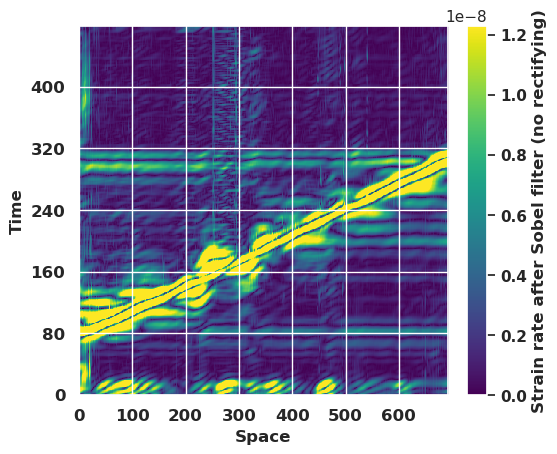

In [4]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=80,
    s2=90,
    std_s=10)
das.sobel_filter(pos_grads=False)

das.heatmap(colorbar_label='Strain rate after Sobel filter (no rectifying)')

Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
vmax: 1.23e-08


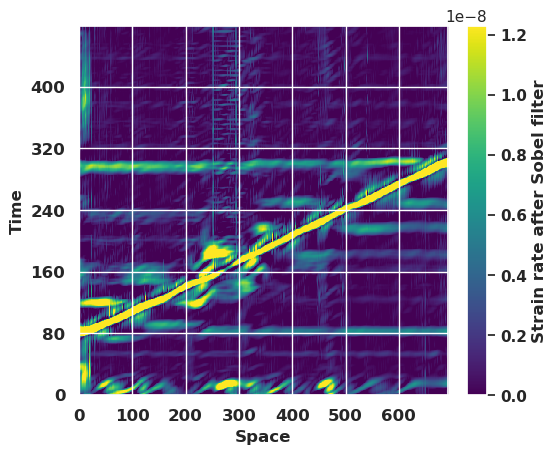

In [5]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=80,
    s2=90,
    std_s=10)
das.sobel_filter(pos_grads=True)

das.heatmap(
    colorbar_label='Strain rate after Sobel filter',
    vmin=0,
    vmax=1.23*10**-8
)

In [23]:
das.signal.index

Index([       08:24:00, 08:24:00.125000, 08:24:00.250000, 08:24:00.375000,
       08:24:00.500000, 08:24:00.625000, 08:24:00.750000, 08:24:00.875000,
              08:24:01, 08:24:01.125000,
       ...
       08:24:58.750000, 08:24:58.875000,        08:24:59, 08:24:59.125000,
       08:24:59.250000, 08:24:59.375000, 08:24:59.500000, 08:24:59.625000,
       08:24:59.750000, 08:24:59.875000],
      dtype='object', length=480)

In [24]:
das.signal.index[1]

datetime.time(8, 24, 0, 125000)